# Squigglepy: Implementation of Squiggle in Python

[Squiggle](https://www.squiggle-language.com/) is a "simple programming language for intuitive probabilistic estimation". It serves as its own standalone programming language with its own syntax, but it is implemented in JavaScript. I like the features of Squiggle and intend to use it frequently, but I also sometimes want to use similar functionalities in Python, especially alongside other Python statistical programming packages like Numpy, Pandas, and Matplotlib. The **squigglepy** package here implements many Squiggle-like functionalities in Python.

## Installation

```shell
pip install squigglepy
```

For plotting support, you can also use the `plots` extra:

```shell
pip install squigglepy[plots]
```

## Usage

### Piano Tuners Example

Here's the Squigglepy implementation of [the example from Squiggle Docs](https://www.squiggle-language.com/docs/Overview):


Mean: 6.87, SD: 9.55
{1: 0,
 5: 1,
 10: 1,
 20: 2,
 30: 2,
 40: 3,
 50: 4,
 60: 5,
 70: 7,
 80: 10,
 90: 15,
 95: 23,
 99: 45}


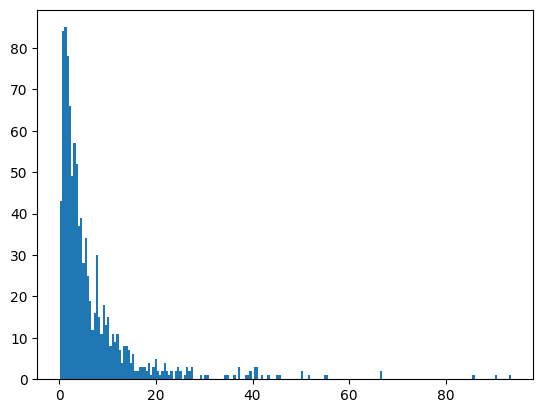

AttributeError: 'ComplexDistribution' object has no attribute 'plot'

In [1]:
import squigglepy as sq
import numpy as np
import matplotlib.pyplot as plt
from squigglepy.numbers import K, M
from pprint import pprint

pop_of_ny_2022 = sq.to(8.1*M, 8.4*M)  # This means that you're 90% confident the value is between 8.1 and 8.4 Million.
pct_of_pop_w_pianos = sq.to(0.2, 1) * 0.01  # We assume there are almost no people with multiple pianos
pianos_per_piano_tuner = sq.to(2*K, 50*K)
piano_tuners_per_piano = 1 / pianos_per_piano_tuner
total_tuners_in_2022 = pop_of_ny_2022 * pct_of_pop_w_pianos * piano_tuners_per_piano
samples = total_tuners_in_2022 @ 1000  # Note: `@ 1000` is shorthand to get 1000 samples

# Get mean and SD
print('Mean: {}, SD: {}'.format(round(np.mean(samples), 2),
                                round(np.std(samples), 2)))

# Get percentiles
pprint(sq.get_percentiles(samples, digits=0))

# Histogram
plt.hist(samples, bins=200)
plt.show()

# Shorter histogram
total_tuners_in_2022.plot()


In [1]:
import sys
sys.path.extend(['../../nba_sympy', '../../nbag', '../../credints/'])


In [2]:
import nbag
import nba_sympy as nsp
import sympy.plotting as syp
import nba_sympy.stats as stats
import numpy as np
import credints.equal_tail_intervals as ci

K = 1e3
M = 1e6

Mean: 8249648.33, SD: 90578.15
{1: 8042879,
 5: 8096444,
 10: 8133461,
 20: 8176632,
 30: 8203006,
 40: 8225386,
 50: 8248039,
 60: 8272442,
 70: 8293264,
 80: 8324128,
 90: 8367870,
 95: 8403105,
 99: 8458829}


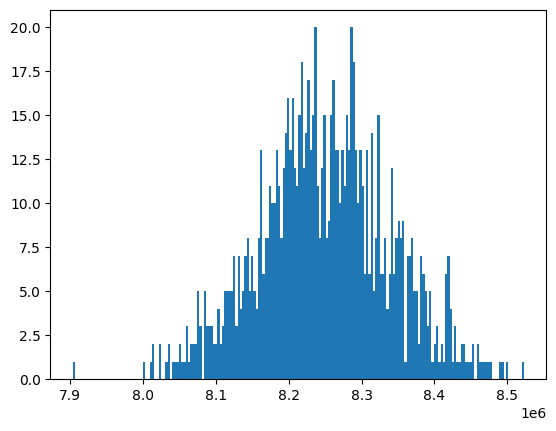

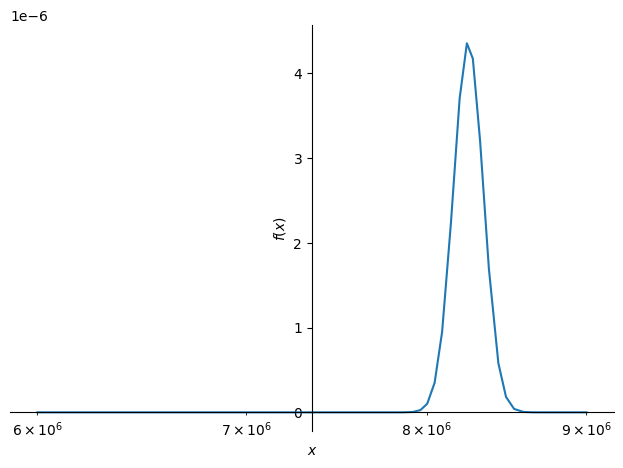

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

pop_of_ny_2022 = ci.log_normal(0.9, [8.1*M, 8.4*M]) # This means that you're 90% confident the value is between 8.1 and 8.4 Million.
pct_of_pop_w_pianos = ci.log_normal(0.9, [0.2, 1], name="pct_of_pop_w_pianos")  * 0.01 # We assume there are almost no people with multiple pianos
pianos_per_piano_tuner = ci.log_normal(0.9, [2*K, 50*K])
piano_tuners_per_piano = 1 / pianos_per_piano_tuner
total_tuners_in_2022 = pop_of_ny_2022 * pct_of_pop_w_pianos * piano_tuners_per_piano

samples = stats.sample(pop_of_ny_2022, size=1000)
# Get mean and SD
print('Mean: {}, SD: {}'.format(round(np.mean(samples), 2),
                                round(np.std(samples), 2)))

# Get percentiles
# TODO: this function is easily re-implemented. We could also 
import squigglepy as sq
pprint(sq.get_percentiles(samples, digits=0))

# Histogram
plt.hist(samples, bins=200)
plt.show()

# plotting the distribution directly [TODO: this is ugly]
x = nsp.symbol("x")
g = stats.density(pop_of_ny_2022)(x)
syp.plot(g, (x, 6e6, 9e6), xscale='log')


And the version from the Squiggle doc that incorporates time:

In [ ]:

import squigglepy as sq
from squigglepy.numbers import K, M

pop_of_ny_2022 = sq.to(8.1*M, 8.4*M)
pct_of_pop_w_pianos = sq.to(0.2, 1) * 0.01
pianos_per_piano_tuner = sq.to(2*K, 50*K)
piano_tuners_per_piano = 1 / pianos_per_piano_tuner

def pop_at_time(t):  # t = Time in years after 2022
    avg_yearly_pct_change = sq.to(-0.01, 0.05)  # We're expecting NYC to continuously grow with an mean of roughly between -1% and +4% per year
    return pop_of_ny_2022 * ((avg_yearly_pct_change + 1) ** t)

def total_tuners_at_time(t):
    return pop_at_time(t) * pct_of_pop_w_pianos * piano_tuners_per_piano

# Get total piano tuners at 2030
sq.get_percentiles(total_tuners_at_time(2030-2022) @ 1000)




**WARNING:** Be careful about dividing by `K`, `M`, etc. `1/2*K` = 500 in Python. Use `1/(2*K)` instead to get the expected outcome.

**WARNING:** Be careful about using `K` to get sample counts. Use `sq.norm(2, 3) @ (2*K)`... `sq.norm(2, 3) @ 2*K` will return only two samples, multiplied by 1000.

### Distributions



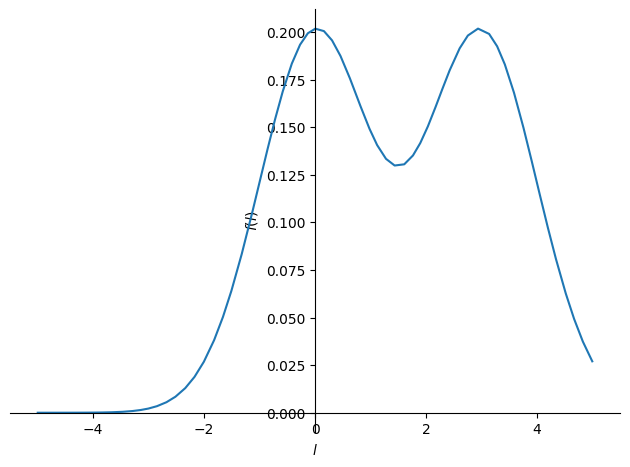

In [11]:
b = stats.bernoulli(0.5)
x = stats.normal(0,1)
y = stats.normal(3,1)
m = b*x + (1-b)*y

l = nsp.Symbol('l')
g = stats.density(m)(l)
syp.plot(g, (l, -5, 5))


In [6]:
mixture = stats.finiteRV({stats.normal(0,1,name="n1"): 0.2, stats.normal(0,2,name="n2"): 0.8})
stats.P(mixture < 0.5)

AttributeError: 'Dict' object has no attribute 'pspace'

In [17]:
import squigglepy as sq

# Normal distribution
sq.norm(1, 3)  # 90% interval from 1 to 3
ci.normal(0.9, [1,3]) # currently, this will break, unless used with name="xyz" argument or as an assignment xyz = ci.normal(0.9, [1,3])

# Distribution can be sampled with mean and sd too
sq.norm(mean=0, sd=1)
stats.normal(0, 1) # similarly, will break

# Shorthand to get one sample
~sq.norm(1, 3)
x = ci.normal(0.9, [1,3])
stats.sample(x)

# Shorthand to get more than one sample
sq.norm(1, 3) @ 100
x = ci.normal(0.9, [1,3])
stats.sample(x, size=100)

# Longhand version to get more than one sample
sq.sample(sq.norm(1, 3), n=100)
...

# Nice progress reporter
sq.sample(sq.norm(1, 3), n=1000, verbose=True)
...

# Other distributions exist
sq.lognorm(1, 10)
ci.log_normal(0.9, [1, 10]) #will break as-is

sq.tdist(1, 10, t=5)
# stats.StudentT is defined, but not implememnted conversion from CI

sq.triangular(1, 2, 3)
stats.triangular(1,2,3)

sq.binomial(p=0.5, n=5)
stats.binomial(5, 0.5)

sq.beta(a=1, b=2)
stats.beta(1, 2)

sq.bernoulli(p=0.5)
stats.bernoulli(0.5)

sq.poisson(10)
stats.poisson(10)

sq.chisquare(2)
stats.chiSquared(2)

sq.gamma(3, 2)
stats.gamma(3, 2)

sq.pareto(1) # Not implemented afaict
stats.pareto(1, 1)

sq.exponential(scale=1)
stats.exponential(1)

# Discrete sampling
sq.discrete({'A': 0.1, 'B': 0.9})
stats.coin(0.9)
stats.finiteRV({'A': 0.1, 'B': 0.9})
stats.bernoulli(0.9, succ='B', fail='A')

# Can return integers
sq.discrete({0: 0.1, 1: 0.3, 2: 0.3, 3: 0.15, 4: 0.15})

# Alternate format (also can be used to return more complex objects)
sq.discrete([[0.1,  0],
             [0.3,  1],
             [0.3,  2],
             [0.15, 3],
             [0.15, 4]])

sq.discrete([0, 1, 2]) # No weights assumes equal weights
stats.discreteUniform([0, 1, 2])

# You can mix distributions together
sq.mixture([sq.norm(1, 3),
            sq.norm(4, 10),
            sq.lognorm(1, 10)],  # Distributions to mix
           [0.3, 0.3, 0.4])     # These are the weights on each distribution

stats.finiteRV

# This is equivalent to the above, just a different way of doing the notation
sq.mixture([[0.3, sq.norm(1,3)],
            [0.3, sq.norm(4,10)],
            [0.4, sq.lognorm(1,10)]])

# Make a zero-inflated distribution
# 60% chance of returning 0, 40% chance of sampling from `norm(1, 2)`.
sq.zero_inflated(0.6, sq.norm(1, 2))


KeyboardInterrupt: 

### Additional Features

In [ ]:

import squigglepy as sq

# You can add and subtract distributions
(sq.norm(1,3) + sq.norm(4,5)) @ 100
(sq.norm(1,3) - sq.norm(4,5)) @ 100
(sq.norm(1,3) * sq.norm(4,5)) @ 100
(sq.norm(1,3) / sq.norm(4,5)) @ 100

# You can also do math with numbers
~((sq.norm(sd=5) + 2) * 2)
~(-sq.lognorm(0.1, 1) * sq.pareto(1) / 10)

# You can change the CI from 90% (default) to 80%
sq.norm(1, 3, credibility=80)

# You can clip
sq.norm(0, 3, lclip=0, rclip=5) # Sample norm with a 90% CI from 0-3, but anything lower than 0 gets clipped to 0 and anything higher than 5 gets clipped to 5.

# You can also clip with a function, and use pipes
sq.norm(0, 3) >> sq.clip(0, 5)




#### Example: Rolling a Die

An example of how to use distributions to build tools:


In [ ]:

import squigglepy as sq

def roll_die(sides, n=1):
    return sq.discrete(list(range(1, sides + 1))) @ n if sides > 0 else None

roll_die(sides=6, n=10)
# [2, 6, 5, 2, 6, 2, 3, 1, 5, 2]




This is already included standard in the utils of this package. Use `sq.roll_die`.

### Bayesian inference

1% of women at age forty who participate in routine screening have breast cancer.
80% of women with breast cancer will get positive mammographies.
9.6% of women without breast cancer will also get positive mammographies.

A woman in this age group had a positive mammography in a routine screening.
What is the probability that she actually has breast cancer?

We can approximate the answer with a Bayesian network (uses rejection sampling):

```Python
import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import M

def mammography(has_cancer):
    return sq.event(0.8 if has_cancer else 0.096)

def define_event():
    cancer = ~sq.bernoulli(0.01)
    return({'mammography': mammography(cancer),
            'cancer': cancer})

bayes.bayesnet(define_event,
               find=lambda e: e['cancer'],
               conditional_on=lambda e: e['mammography'],
               n=1*M)
# 0.07723995880535531
```

Or if we have the information immediately on hand, we can directly calculate it. Though this doesn't work for very complex stuff.



```Python
from squigglepy import bayes
bayes.simple_bayes(prior=0.01, likelihood_h=0.8, likelihood_not_h=0.096)
# 0.07763975155279504
```



You can also make distributions and update them:



In [ ]:
import matplotlib.pyplot as plt
import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K
import numpy as np

print('Prior')
prior = sq.norm(1,5)
prior_samples = prior @ (10*K)
plt.hist(prior_samples, bins = 200)
plt.show()
print(sq.get_percentiles(prior_samples))
print('Prior Mean: {} SD: {}'.format(np.mean(prior_samples), np.std(prior_samples)))
print('-')

print('Evidence')
evidence = sq.norm(2,3)
evidence_samples = evidence @ (10*K)
plt.hist(evidence_samples, bins = 200)
plt.show()
print(sq.get_percentiles(evidence_samples))
print('Evidence Mean: {} SD: {}'.format(np.mean(evidence_samples), np.std(evidence_samples)))
print('-')

print('Posterior')
posterior = bayes.update(prior, evidence)
posterior_samples = posterior @ (10*K)
plt.hist(posterior_samples, bins = 200)
plt.show()
print(sq.get_percentiles(posterior_samples))
print('Posterior Mean: {} SD: {}'.format(np.mean(posterior_samples), np.std(posterior_samples)))

print('Average')
average = bayes.average(prior, evidence)
average_samples = average @ (10*K)
plt.hist(average_samples, bins = 200)
plt.show()
print(sq.get_percentiles(average_samples))
print('Average Mean: {} SD: {}'.format(np.mean(average_samples), np.std(average_samples)))




#### Example: Alarm net

This is the alarm network from [Bayesian Artificial Intelligence - Section 2.5.1](https://bayesian-intelligence.com/publications/bai/book/BAI_Chapter2.pdf):

> Assume your house has an alarm system against burglary.
>
> You live in the seismically active area and the alarm system can get occasionally set off by an earthquake.
>
> You have two neighbors, Mary and John, who do not know each other.
> If they hear the alarm they call you, but this is not guaranteed.
>
> The chance of a burglary on a particular day is 0.1%.
> The chance of an earthquake on a particular day is 0.2%.
>
> The alarm will go off 95% of the time with both a burglary and an earthquake, 94% of the time with just a burglary, 29% of the time with just an earthquake, and 0.1% of the time with nothing (total false alarm).
>
> John will call you 90% of the time when the alarm goes off. But on 5% of the days, John will just call to say "hi".
> Mary will call you 70% of the time when the alarm goes off. But on 1% of the days, Mary will just call to say "hi".


In [ ]:
import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import M

def p_alarm_goes_off(burglary, earthquake):
    if burglary and earthquake:
        return 0.95
    elif burglary and not earthquake:
        return 0.94
    elif not burglary and earthquake:
        return 0.29
    elif not burglary and not earthquake:
        return 0.001

def p_john_calls(alarm_goes_off):
    return 0.9 if alarm_goes_off else 0.05

def p_mary_calls(alarm_goes_off):
    return 0.7 if alarm_goes_off else 0.01

def define_event():
    burglary_happens = sq.event(p=0.001)
    earthquake_happens = sq.event(p=0.002)
    alarm_goes_off = sq.event(p_alarm_goes_off(burglary_happens, earthquake_happens))
    john_calls = sq.event(p_john_calls(alarm_goes_off))
    mary_calls = sq.event(p_mary_calls(alarm_goes_off))
    return {'burglary': burglary_happens,
            'earthquake': earthquake_happens,
            'alarm_goes_off': alarm_goes_off,
            'john_calls': john_calls,
            'mary_calls': mary_calls}

# What are the chances that both John and Mary call if an earthquake happens?
bayes.bayesnet(define_event,
               n=1*M,
               find=lambda e: (e['mary_calls'] and e['john_calls']),
               conditional_on=lambda e: e['earthquake'])
# Result will be ~0.19, though it varies because it is based on a random sample.
# This also may take a minute to run.

# If both John and Mary call, what is the chance there's been a burglary?
bayes.bayesnet(define_event,
               n=1*M,
               find=lambda e: e['burglary'],
               conditional_on=lambda e: (e['mary_calls'] and e['john_calls']))
# Result will be ~0.27, though it varies because it is based on a random sample.
# This will run quickly because there is a built-in cache.
# Use `cache=False` to not build a cache and `reload_cache=True` to recalculate the cache.




Note that the amount of Bayesian analysis that squigglepy can do is pretty limited. For more complex bayesian analysis, consider [sorobn](https://github.com/MaxHalford/sorobn), [pomegranate](https://github.com/jmschrei/pomegranate), [bnlearn](https://github.com/erdogant/bnlearn), or [pyMC](https://github.com/pymc-devs/pymc).

#### Example: A Demonstration of the Monty Hall Problem


In [ ]:

import squigglepy as sq
from squigglepy import bayes
from squigglepy.numbers import K, M, B, T


def monte_hall(door_picked, switch=False):
    doors = ['A', 'B', 'C']
    car_is_behind_door = ~sq.discrete(doors)
    reveal_door = ~sq.discrete([d for d in doors if d != door_picked and d != car_is_behind_door])

    if switch:
        old_door_picked = door_picked
        door_picked = [d for d in doors if d != old_door_picked and d != reveal_door][0]

    won_car = (car_is_behind_door == door_picked)
    return won_car


def define_event():
    door = ~sq.discrete(['A', 'B', 'C'])
    switch = sq.event(0.5)
    return {'won': monte_hall(door_picked=door, switch=switch),
            'switched': switch}

RUNS = 10*K
r = bayes.bayesnet(define_event,
                   find=lambda e: e['won'],
                   conditional_on=lambda e: e['switched'],
                   verbose=True,
                   n=RUNS)
print('Win {}% of the time when switching'.format(int(r * 100)))

r = bayes.bayesnet(define_event,
                   find=lambda e: e['won'],
                   conditional_on=lambda e: not e['switched'],
                   verbose=True,
                   n=RUNS)
print('Win {}% of the time when not switching'.format(int(r * 100)))

# Win 66% of the time when switching
# Win 34% of the time when not switching




#### Example: More complex coin/dice interactions

> Imagine that I flip a coin. If heads, I take a random die out of my blue bag. If tails, I take a random die out of my red bag.
> The blue bag contains only 6-sided dice. The red bag contains a 4-sided die, a 6-sided die, a 10-sided die, and a 20-sided die.
> I then roll the random die I took. What is the chance that I roll a 6?



In [ ]:

import squigglepy as sq
from squigglepy.numbers import K, M, B, T
from squigglepy import bayes

def define_event():
    if sq.flip_coin() == 'heads': # Blue bag
        return sq.roll_die(6)
    else: # Red bag
        return sq.discrete([4, 6, 10, 20]) >> sq.roll_die


bayes.bayesnet(define_event,
               find=lambda e: e == 6,
               verbose=True,
               n=100*K)
# This run for me returned 0.12306 which is pretty close to the correct answer of 0.12292



### Kelly betting

You can use probability generated, combine with a bankroll to determine bet sizing using [Kelly criterion](https://en.wikipedia.org/wiki/Kelly_criterion).

For example, if you want to Kelly bet and you've...

- determined that your price (your probability of the event in question happening / the market in question resolving in your favor) is $0.70 (70%)
- see that the market is pricing at $0.65
- you have a bankroll of $1000 that you are willing to bet

You should bet as follows:



In [ ]:
import squigglepy as sq
kelly_data = sq.kelly(my_price=0.70, market_price=0.65, bankroll=1000)
kelly_data['kelly']  # What fraction of my bankroll should I bet on this?
# 0.143
kelly_data['target']  # How much money should be invested in this?
# 142.86
kelly_data['expected_roi']  # What is the expected ROI of this bet?
# 0.077



### More examples

You can see more examples of squigglepy in action [here](https://github.com/peterhurford/public-botecs).

## Run tests

Use `black .` for formatting.

Run `ruff check . && pytest && pip3 install . && python3 tests/integration.py`

## Disclaimers

This package is unofficial and supported by myself and Rethink Priorities. It is not affiliated with or associated with the Quantified Uncertainty Research Institute, which maintains the Squiggle language (in JavaScript).

This package is also new and not yet in a stable production version, so you may encounter bugs and other errors. Please report those so they can be fixed. It's also possible that future versions of the package may introduce breaking changes.

This package is available under an MIT License.

## Acknowledgements

- Thanks to Ozzie Gooen and the Quantified Uncertainty Research Institute for creating and maintaining the original Squiggle language.
- Thanks to Dawn Drescher for helping me implement math between distributions.
- Thanks to Dawn Drescher for coming up with the idea to use `~` as a shorthand for `sample`, as well as helping me implement it.